# <span style="color:orange">Appliquer le code du Baromètre de la Science Ouverte aux données de l'Inserm</span>

Après réception du fichier csv contenant la liste de DOI enrichie (ajout du titre, des auteurs, de l'année, du statut open access...) de la part du MESRI, les graphiques peuvent être générés directement depuis le Baromètre national (voir le mode d'emploi sur la partie "déclinaisons locales" du site web du BSO national).
Néanmoins, à partir de ce fichier, certains graphiques réalisés pour le Baromètre Inserm peuvent toujours être générés et mis à jour en suivant ce code.
Il suffit de remplacer "inserm" par le nom de son établissement à l'intérieur du code.

Les résultats obtenus ici sont le reflet de la situation d'ouverture des publications en décembre 2021, date à laquelle les dernières extractions ont été réalisées. Le Baromètre national et, par extension, ses déclinaisons locales depuis le portail national, étant mis à jour régulièrement, les taux affichés sur les graphiques ci-dessous sont obsolètes.

In [1]:
import pandas as pd

In [2]:
import csv

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## <span style="color:orange">Importer dans le notebook les données préalablement traitées</span>

In [4]:
publis_inserm_df = pd.read_csv("Data/raw/bso-publications-latest_180036048_enriched.csv")

## <span style="color:orange">Générer les graphiques</span>

Les graphiques présents sur le site du Baromètre national ont été écrits en JavaScript. Afin de rendre plus facile l'utilisation de ce Baromètre local, la génération des graphiques a été ici pensée en Python, grâce aux librairies Pandas et Matplotlib.

Proportion des publications 2020 en accès ouvert

In [5]:
pie_data = publis_inserm_df.loc[publis_inserm_df['year'] == 2020.0,:]

Récuperer les différentes valeurs qui nous intéressent:
    - closed = l'article n'est pas en accès ouvert/dans un journal non ouvert
    - gold_journal = l'article est dans un journal gold
        - gold_gold : gold + gold
        - gold_archives_ouvertes : gold + archives ouvertes
    - free: libre éditeur
        - free_archives_ouvertes: free + archives ouvertes
        - free_freepubli : free + free
    - archives ouvertes simple

In [6]:
oa_yes_no = pie_data['is_oa'].value_counts().sort_index()
oa_yes_no

False     4486
True     13738
Name: is_oa, dtype: int64

In [7]:
oa_no = pie_data.loc[pie_data['is_oa'] == False,:]
oa_yes = pie_data.loc[pie_data['is_oa'] == True,:]
free = oa_yes.loc[oa_yes['journal_is_in_doaj'] == False,:]
repository = pie_data.loc[pie_data['oa_host_type'] == 'repository',:]

In [8]:
pie_data['oa_yes'] = pie_data.is_oa == True
pie_data['oa_no'] = pie_data.is_oa == False
pie_data['gold'] = pie_data.journal_is_in_doaj == True
pie_data['free'] = oa_yes.journal_is_in_doaj == False
#pie_data['repository'] = free.oa_type == 'repository'
pie_data['repository'] = pie_data.oa_host_type == 'repository'

<ipython-input-8-4697ebd9d592>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_data['oa_yes'] = pie_data.is_oa == True
<ipython-input-8-4697ebd9d592>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pie_data['oa_no'] = pie_data.is_oa == False
<ipython-input-8-4697ebd9d592>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [9]:
pie_data_ext = pd.DataFrame({'acces_ferme' : pie_data['oa_no'],
                   'publications_gold' : pie_data['gold'],
                   'publications_free' : pie_data['free'],
                   'depots_archives_ouvertes' : pie_data['repository']           
                            })
pie_data_ext

,acces_ferme,publications_gold,publications_free,depots_archives_ouvertes
12331,False,False,True,False
22341,False,False,True,True
24337,True,False,NaN,False
29762,False,False,True,False
31571,False,False,True,False
...,...,...,...,...
83971,True,False,NaN,False
83972,True,False,NaN,False
83978,True,False,NaN,False
84002,False,False,True,True


In [10]:
pie_data_ext_chiffres_2 = pie_data_ext.value_counts([pie_data_ext.acces_ferme == True,
                                                               pie_data_ext.publications_gold == True,
                                                               pie_data_ext.publications_free == True,
                                                               pie_data_ext.depots_archives_ouvertes == True]).sort_index()
pie_data_ext_chiffres_2

acces_ferme  publications_gold  publications_free  depots_archives_ouvertes
False        False              True               False                       5430
                                                   True                        2438
             True               False              False                       5849
                                                   True                          21
True         False              False              False                       4486
dtype: int64

In [11]:
oa_no = pie_data.loc[pie_data['is_oa'] == False,:]
gold = pie_data_ext.loc[pie_data_ext['publications_gold'] == True,:]
publications_free = pie_data_ext.loc[pie_data_ext['publications_free'] == True,:]
free = oa_yes.loc[oa_yes['journal_is_in_doaj'] == False,:]

In [12]:
repository=pie_data.loc[pie_data['repository'] == True,:]

In [13]:
pie_data_ext['gold'] = pie_data_ext.publications_gold == True
pie_data_ext['oa_no'] = pie_data.is_oa == False
pie_data_ext['gold_seul'] = gold.depots_archives_ouvertes == False
pie_data_ext['gold_rep'] = gold.depots_archives_ouvertes == True
pie_data_ext['free_publi'] = publications_free.depots_archives_ouvertes == False
pie_data_ext['free_rep'] = publications_free.depots_archives_ouvertes == True
pie_data_ext['repository'] = pie_data.oa_host_type == 'repository' 

In [14]:
closed = pie_data.loc[pie_data['is_oa'] == False,:]
gold = pie_data.loc[pie_data['journal_is_in_doaj'] == True,:]
gold_seul = gold.loc[gold['oa_host_type'] == 'publisher',:]
gold_rep = gold.loc[gold['oa_host_type'] == 'publisher;repository',:] 
free_publi = free.loc[free['oa_host_type'] == 'publisher',:]
free_rep = free.loc[free['oa_host_type'] =='publisher;repository',:]
rep_seul = pie_data.loc[pie_data['oa_host_type'] == 'repository',:]

In [15]:
pie_data_int = pd.DataFrame({'acces_ferme' : closed['oa_host_type'],
                   'publications_gold_seules' : gold_seul['oa_host_type'],
                   'publications_gold_archives_ouvertes' : gold_rep['oa_host_type'],          
                   'publications_free_editeurs' : free_publi['oa_host_type'],
                   'publications_free_archives_ouvertes' : free_rep['oa_host_type'],
                   'publications_archives_ouvertes' : rep_seul['oa_host_type']
                            })
pie_data_int

,acces_ferme,publications_gold_seules,publications_gold_archives_ouvertes,publications_free_editeurs,publications_free_archives_ouvertes,publications_archives_ouvertes
12331,NaN,NaN,NaN,publisher,NaN,NaN
22341,NaN,NaN,NaN,NaN,NaN,repository
24337,closed,NaN,NaN,NaN,NaN,NaN
29762,NaN,NaN,NaN,publisher,NaN,NaN
31571,NaN,NaN,NaN,publisher,NaN,NaN
...,...,...,...,...,...,...
83971,closed,NaN,NaN,NaN,NaN,NaN
83972,closed,NaN,NaN,NaN,NaN,NaN
83978,closed,NaN,NaN,NaN,NaN,NaN
84002,NaN,NaN,NaN,NaN,NaN,repository


In [16]:
pie_data_int_chiffres=pie_data_int.value_counts([pie_data_int.acces_ferme == 'closed',
                                                               pie_data_int.publications_gold_seules == 'publisher',
                                                               pie_data_int.publications_gold_archives_ouvertes == 'publisher;repository',
                                                               pie_data_int.publications_archives_ouvertes == 'repository',
                                                               pie_data_int.publications_free_editeurs == 'publisher',
                                                               pie_data_int.publications_free_archives_ouvertes == 'publisher;repository']).sort_index()
pie_data_int_chiffres

acces_ferme  publications_gold_seules  publications_gold_archives_ouvertes  publications_archives_ouvertes  publications_free_editeurs  publications_free_archives_ouvertes
False        False                     False                                False                           False                       True                                   3463
                                                                                                            True                        False                                  1967
                                                                            True                            False                       False                                  2459
                                       True                                 False                           False                       False                                  5777
             True                      False                                False                           

Text(0.55, 1.8, 'Proportion des publications 2019 en accès ouvert (mesuré en 2021)')

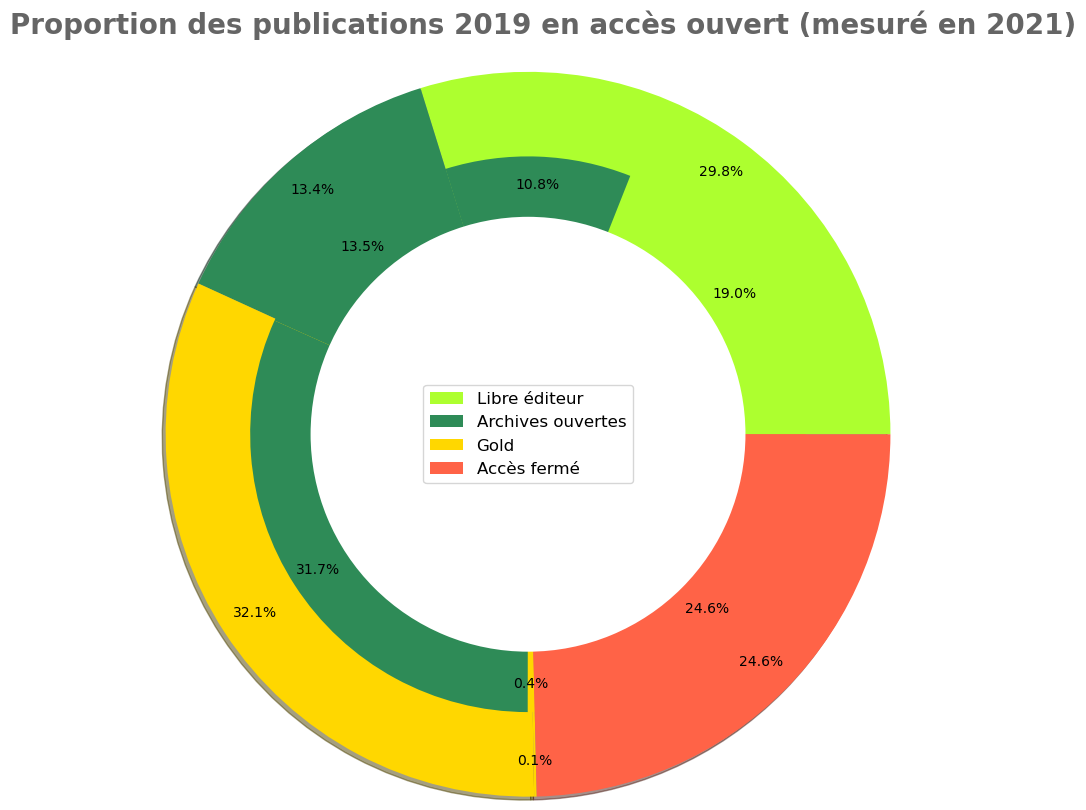

In [18]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.pie(pie_data_ext_chiffres_2, labels=None, radius=3, labeldistance = None, colors=['greenyellow', 'seagreen','gold', 'gold','tomato'], autopct=lambda x: str(round(x, 1)) + '%', pctdistance = 0.9, shadow = True);
ax.pie(pie_data_int_chiffres, labels=['Libre éditeur', None,'Archives ouvertes', None,'Gold','Accès fermé'], radius=2.3, labeldistance = None, colors=['greenyellow','seagreen','seagreen','seagreen','gold','tomato'], autopct=lambda x: str(round(x, 1)) + '%', 
       pctdistance = 0.9);
ax.pie([1], radius=1.8, colors='white');
ax.legend(loc="center", fontsize = 12)
plt.title('Proportion des publications 2019 en accès ouvert (mesuré en 2021)', fontsize = 20, x = 0.55, y = 1.8,
          fontweight = 'bold', alpha = 0.6)
#plt.savefig('Data/outputs/2019_proportion_publications_oa_20211214.png', dpi=150, bbox_inches='tight', pad_inches=0.9)

Taux d'accès ouvert par disciplines 2020

In [19]:
publications_2020 = publis_inserm_df.loc[publis_inserm_df['year'] == 2020.0,:]

In [20]:
publications_par_domaine_type = publications_2020['bso_classification'].value_counts().sort_index()
publications_par_domaine_type

Biology (fond.)                                  3342
Chemistry                                         361
Computer and \n information sciences               72
Earth, Ecology, \nEnergy and applied biology      148
Engineering                                        23
Humanities                                         35
Mathematics                                        19
Medical research                                13827
Physical sciences, Astronomy                      225
Social sciences                                   172
Name: bso_classification, dtype: int64

In [21]:
conditionlist = [
    (publications_2020['is_oa'] == False) ,
    (publications_2020['journal_is_in_doaj'] == True),
    ((publications_2020['is_oa'] == True) & (publications_2020['journal_is_in_doaj'] == False) & ((publications_2020['oa_host_type'] == 'publisher') | (publications_2020['oa_host_type'] == 'publisher;repository'))),
    (publications_2020['oa_host_type'] == 'repository') 
    ]
choicelist = ['closed', 'gold', 'free', 'rep']
publications_2020['depot'] = np.select(conditionlist, choicelist, default='Not Specified')

<ipython-input-21-00a2e5372ff1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  publications_2020['depot'] = np.select(conditionlist, choicelist, default='Not Specified')


In [22]:
df_oa_discipline_global_type = pd.crosstab([publications_2020['bso_classification']],publications_2020['depot'])
# Ajout d'une colonne avec le total par discipline
df_oa_discipline_global_type["Total"] = publications_par_domaine_type
# Traduction des disciplines en français
df_oa_discipline_global_type.rename(index = {'Biology (fond.)': 'Biologie (fond.)', 'Chemistry': 'Chimie', 
                                         'Computer and \n information sciences' : 'Informatique',
                                       'Earth, Ecology, \nEnergy and applied biology' : 'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        'Engineering' : "Sciences de l'Ingénieur",
                                        'Humanities' : 'Humanités',
                                        'Mathematics' : 'Mathématiques',
                                        'Medical research' : 'Sciences médicales',
                                        'Physical sciences, Astronomy' : 'Sciences physiques, astronomie',
                                        'Social sciences' : 'Sciences sociales'}, inplace = True)
df_oa_discipline_global_type = df_oa_discipline_global_type.sort_values(by='closed', ascending=True)
# Ajout d'une colonne qui concatène le nom de la discipline et le total
df_oa_discipline_global_type["y_label"] = df_oa_discipline_global_type.index + "\n" + df_oa_discipline_global_type["Total"].apply(str) \
                                     + " " + "publications"
# Réindexation de l'index pour que les bonnes informations s'affichent dans le graphique final
df_oa_discipline_global_type.index = df_oa_discipline_global_type["y_label"]
df_oa_discipline_global_type

depot,closed,free,gold,rep,Total,y_label
y_label,,,,,,
Sciences de l'Ingénieur\n23 publications,1,10,1,11,23,Sciences de l'Ingénieur\n23 publications
Informatique\n72 publications,4,9,18,41,72,Informatique\n72 publications
Humanités\n35 publications,8,12,10,5,35,Humanités\n35 publications
Mathématiques\n19 publications,8,4,1,6,19,Mathématiques\n19 publications
"Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée\n148 publications",16,43,50,39,148,"Sciences de la Terre, Ecologie, \nEnergie et b..."
"Sciences physiques, astronomie\n225 publications",20,40,50,115,225,"Sciences physiques, astronomie\n225 publications"
Chimie\n361 publications,52,85,72,152,361,Chimie\n361 publications
Sciences sociales\n172 publications,65,42,42,23,172,Sciences sociales\n172 publications
Biologie (fond.)\n3342 publications,377,870,1620,475,3342,Biologie (fond.)\n3342 publications


In [23]:
df_oa_discipline_type = pd.crosstab([publications_2020['bso_classification']],publications_2020['depot'])
df_oa_discipline_type = (df_oa_discipline_type.T / df_oa_discipline_type.T.sum()).mul(100).round(1)
df_oa_discipline_type = df_oa_discipline_type.T
df_oa_discipline_type["Total"] = publications_par_domaine_type
df_oa_discipline_type.rename(index = {'Biology (fond.)': 'Biologie (fond.)', 'Chemistry': 'Chimie', 
                                         'Computer and \n information sciences' : 'Informatique',
                                       'Earth, Ecology, \nEnergy and applied biology' : 'Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée',
                                        'Engineering' : "Sciences de l'Ingénieur",
                                        'Humanities' : 'Humanités',
                                        'Mathematics' : 'Mathématiques',
                                        'Medical research' : 'Sciences médicales',
                                        'Physical sciences, Astronomy' : 'Sciences physiques, astronomie',
                                        'Social sciences' : 'Sciences sociales'}, inplace = True)
df_oa_discipline_type["y_label"] = df_oa_discipline_type.index + "\n" + df_oa_discipline_type["Total"].apply(str) \
                                     + " " + "publications"
df_oa_discipline_type.index = df_oa_discipline_type["y_label"]
df_oa_discipline_type = df_oa_discipline_type.sort_values(by='closed', ascending=True)
df_oa_discipline_type

depot,closed,free,gold,rep,Total,y_label
y_label,,,,,,
Sciences de l'Ingénieur\n23 publications,4.3,43.5,4.3,47.8,23,Sciences de l'Ingénieur\n23 publications
Informatique\n72 publications,5.6,12.5,25.0,56.9,72,Informatique\n72 publications
"Sciences physiques, astronomie\n225 publications",8.9,17.8,22.2,51.1,225,"Sciences physiques, astronomie\n225 publications"
"Sciences de la Terre, Ecologie, \nEnergie et biologie appliquée\n148 publications",10.8,29.1,33.8,26.4,148,"Sciences de la Terre, Ecologie, \nEnergie et b..."
Biologie (fond.)\n3342 publications,11.3,26.0,48.5,14.2,3342,Biologie (fond.)\n3342 publications
Chimie\n361 publications,14.4,23.5,19.9,42.1,361,Chimie\n361 publications
Humanités\n35 publications,22.9,34.3,28.6,14.3,35,Humanités\n35 publications
Sciences médicales\n13827 publications,28.5,31.2,29.0,11.4,13827,Sciences médicales\n13827 publications
Sciences sociales\n172 publications,37.8,24.4,24.4,13.4,172,Sciences sociales\n172 publications


Text(0.49, 1.02, "Taux d'accès ouvert aux publications 2020 par discipline")

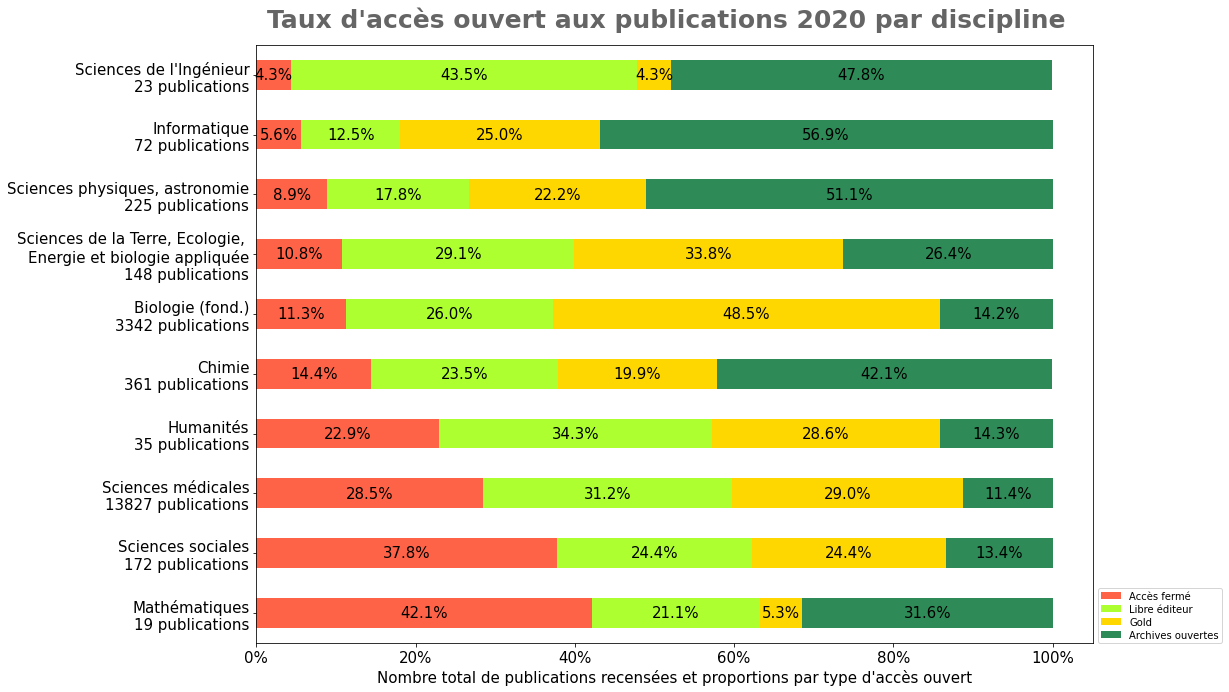

In [24]:
import matplotlib.ticker as mtick

ax = df_oa_discipline_type.drop(["Total", "y_label"], axis=1).plot(kind="barh", stacked=True, figsize=(15, 11), color=['tomato','greenyellow','gold','seagreen'])
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

labels = []
for j in df_oa_discipline_type.columns:
    for i in df_oa_discipline_type.index:
        label = str(df_oa_discipline_type.loc[i][j]) + "%"
        labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', fontsize=15)

# Trier les disciplines par ordre alphabétique
plt.gca().invert_yaxis()
plt.tick_params(axis = 'both', labelsize = 15)

plt.xlabel("Nombre total de publications recensées et proportions par type d'accès ouvert", fontsize=15)  
plt.ylabel(None, fontsize = 13)

# Les légendes sont nativement en anglais. Elles ont été renommées ici, mais attention, pour une réutilisation avec d'autres
# données, il est conseillé d'enlever cette liste ["Accès fermé", "Editeur"...] et de générer le graphique une 1ère
# fois pour voir quels types de documents ressortent et dans quel ordre. On peut toujours renommer la légende dans un 2ème 
# temps.
plt.legend(['Accès fermé', 'Libre éditeur', 'Gold', 'Archives ouvertes'],
              loc = 'best', ncol = 1,
              frameon = True, markerscale = 2, title = None,
              borderpad = 0.3, labelspacing = 0.3, bbox_to_anchor=(1, 0.1))

plt.title("Taux d'accès ouvert aux publications 2020 par discipline", fontsize = 25, x = 0.49, y = 1.02,
          fontweight = 'bold', alpha = 0.6)
#plt.savefig('Data/outputs/2020_taux_type_oa_discipline_type_20220217.png', dpi=100, bbox_inches='tight', pad_inches=0.9)

Evolution des frais de publications (APC)

Les données ont majoritairement été extraites de la plateformes OpenAPC mais une partie des sources sont internes à l'Institut. Pour autant, l'Inserm met à disposition cette portion de code, à toutes fins utiles.

In [25]:
open_APC_df = pd.read_csv("Data/raw/open_apc_inserm_15-19.csv")

In [26]:
all_graph_data_df = open_APC_df.sort_values(['period','is_hybrid','euro'],ascending=False)
graph_data_df = all_graph_data_df[['period','is_hybrid','euro']]

In [27]:
graph_data_df

,period,is_hybrid,euro
1939,2019,True,4700.00
1868,2019,True,4485.87
1601,2019,True,4480.00
1875,2019,True,4480.00
1878,2019,True,4480.00
...,...,...,...
468,2015,False,267.30
469,2015,False,247.00
471,2015,False,232.50
472,2015,False,223.14


In [28]:
graph_data_gold = graph_data_df.loc[graph_data_df['is_hybrid'] == False,:]

In [29]:
graph_data_gold

,period,is_hybrid,euro
1635,2019,False,5148.00
1622,2019,False,4500.00
1657,2019,False,4480.00
1948,2019,False,4480.00
2015,2019,False,4480.00
...,...,...,...
468,2015,False,267.30
469,2015,False,247.00
471,2015,False,232.50
472,2015,False,223.14


In [30]:
graph_data_gold_2019 = graph_data_gold.loc[graph_data_gold['period'] == 2019.0,:]
somme_gold_2019 = graph_data_gold_2019['euro'].sum()

In [31]:
somme_gold_2019

1105484.3

In [32]:
graph_data_gold_2018 = graph_data_gold.loc[graph_data_gold['period'] == 2018.0,:]
somme_gold_2018 = graph_data_gold_2018['euro'].sum()

In [33]:
somme_gold_2018

781361.5700000001

In [34]:
graph_data_gold_2017 = graph_data_gold.loc[graph_data_gold['period'] == 2017.0,:]
somme_gold_2017 = graph_data_gold_2017['euro'].sum()

In [35]:
somme_gold_2017

1042570.37

In [36]:
graph_data_gold_2015 = graph_data_gold.loc[graph_data_gold['period'] == 2015.0,:]
somme_gold_2015 = graph_data_gold_2015['euro'].sum()

In [37]:
somme_gold_2015

645550.9400000001

In [38]:
graph_data_hybrid = graph_data_df.loc[graph_data_df['is_hybrid'] == True,:]

In [39]:
graph_data_hybrid

,period,is_hybrid,euro
1939,2019,True,4700.00
1868,2019,True,4485.87
1601,2019,True,4480.00
1875,2019,True,4480.00
1878,2019,True,4480.00
...,...,...,...
446,2015,True,741.00
447,2015,True,734.00
458,2015,True,536.90
461,2015,True,450.00


In [40]:
graph_data_hybrid_2019 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2019.0,:]
somme_hybrid_2019 = graph_data_hybrid_2019['euro'].sum()

In [41]:
somme_hybrid_2019

158720.41999999998

In [42]:
graph_data_hybrid_2018 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2018.0,:]
somme_hybrid_2018 = graph_data_hybrid_2018['euro'].sum()

In [43]:
somme_hybrid_2018

141293.34

In [44]:
graph_data_hybrid_2017 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2017.0,:]
somme_hybrid_2017 = graph_data_hybrid_2017['euro'].sum()

In [45]:
somme_hybrid_2017

166908.78

In [46]:
graph_data_hybrid_2015 = graph_data_hybrid.loc[graph_data_hybrid['period'] == 2015.0,:]
somme_hybrid_2015 = graph_data_hybrid_2015['euro'].sum()

In [47]:
somme_hybrid_2015

172639.52000000002

<ipython-input-48-d506c0f151e7>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['0', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])


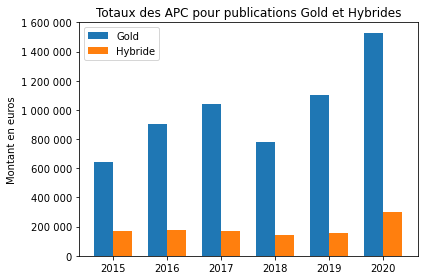

In [48]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['2015', '2016', '2017', '2018', '2019', '2020']
gold = [somme_gold_2015, 902802, somme_gold_2017, somme_gold_2018, somme_gold_2019, 1529664]
hybrid = [somme_hybrid_2015, 179945, somme_hybrid_2017, somme_hybrid_2018, somme_hybrid_2019, 303541]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gold, width, label='Gold')
rects2 = ax.bar(x + width/2, hybrid, width, label='Hybride')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Montant en euros')
ax.set_title('Totaux des APC pour publications Gold et Hybrides')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 1600000)
ax.yaxis.set_ticklabels(['0', '200 000', '400 000', '600 000', '800 000', '1 000 000', '1 200 000', '1 400 000', '1 600 000'])
ax.legend()
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

#plt.show()

#plt.savefig('./Totaux_APC_Gold_Hybride_20211110.png', dpi=100, bbox_inches='tight', pad_inches=0.9)